# **1. PROBLEMA**

## **1.1. Contexto**

**Dataset:**

El conjunto de datos *'clientes.xlsx'* fue descargado de una base de datos de un banco que contiene datos caracteristicos de los clientes.

**Objetivo:** Realizar el preprocesamiento de datos de la base de datos "clientes.xlsx".

>

**Desarrollo:**

➡️ Identifique problemas de registro, datos nulos y atípicos.

➡️ Realice una rutina de limpieza, imputación y transformación de los datos.

Nombre: Mario Ayavire

## **1.2. Librerías**

In [44]:
# OPERACIONES CON ARREGLOS (MATRICES Y VECTORES)
import numpy as np

# ESTRUCTURA Y MANIPULACIÓN DE DATOS
import pandas as pd

# VISUALIZACIÓN
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sb
from seaborn import kdeplot
from seaborn import lmplot
from seaborn import boxplot
# Configura el estilo de seaborn para desactivar la notación científica
sb.set(style="ticks", rc={'axes.formatter.limits': (-2, 10)})

# ADVERTENCIAS
import warnings
warnings.filterwarnings('ignore')

## **1.3. Carga de datos**

In [45]:
df = pd.read_excel("clientes.xlsx")

# **2. CONJUNTO DE DATOS**

## **2.1. Exploración inicial**

In [ ]:
#Cantidad de filas x cantidad de columnas
df.shape

(200584, 11)

In [ ]:
list(df.columns.values)

['Id_cliente',
 'Seguro',
 'Genero',
 'Ciudad',
 'Region',
 'Estado_Civil',
 'Educacion',
 'N°_Hijos',
 'Cupo_TC',
 'Gasto_Mensual',
 'Columna 11']

In [ ]:
#Primeros registros
df.head()

,Id_cliente,Seguro,Genero,Ciudad,Region,Estado_Civil,Educacion,N°_Hijos,Cupo_TC,Gasto_Mensual,Columna 11
0,23210,Accidente,Femenino,0,Los Lagos,$,Técnico,0.0,10000000.0,592360.0,NaN
1,23211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23212,Accidente,$,Ovalle,NaN,Soltero(a),NaN,3.0,1000000.0,-578670.0,NaN
3,23213,Accidente,Masculino,NaN,NaN,Casado(a),Técnico,2.0,1000000.0,714031.0,NaN
4,23214,Accidente,Masculino,Concepción,NaN,Soltero(a),Técnico,0.0,NaN,771194.0,NaN


In [ ]:
#Ultimos registros
df.tail()

,Id_cliente,Seguro,Genero,Ciudad,Region,Estado_Civil,Educacion,N°_Hijos,Cupo_TC,Gasto_Mensual,Columna 11
200579,223789,NaN,0,Valparaíso,Valparaíso,Soltero(a),Magister,2.0,3500000.0,NaN,NaN
200580,223790,Salud,Femenino,Valparaíso,Valparaíso,0,Universitario,1.0,-2.0,2276840.0,NaN
200581,223791,Salud,Femenino,Valparaíso,Valparaíso,Casado(a),Doctorado,0.0,NaN,7156530.0,NaN
200582,223792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200583,223793,Automotriz,Masculino,Valparaíso,$,$,Media,0.0,500000.0,938508.0,NaN


In [ ]:
#Registro aleatorio
df.sample(5)

,Id_cliente,Seguro,Genero,Ciudad,Region,Estado_Civil,Educacion,N°_Hijos,Cupo_TC,Gasto_Mensual,Columna 11
119175,142385,Automotriz,Masculino,Los Ángeles,Biobío,Soltero(a),Universitario,3.0,1500000.0,1310110.0,NaN
148028,171238,Automotriz,Masculino,Santiago,Metropolitana,Casado(a),Magister,3.0,3500000.0,5328780.0,NaN
194980,218190,Automotriz,Masculino,Valparaíso,Valparaíso,Soltero(a),Técnico,3.0,1000000.0,824182.0,NaN
112727,135937,Vida,Masculino,Santiago,Metropolitana,Soltero(a),Doctorado,0.0,5000000.0,7184000.0,NaN
104424,127634,Desgravamen,Femenino,Copiapó,Atacama,Viudo(a),Técnico,3.0,1000000.0,981027.0,NaN


In [ ]:
#Tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200584 entries, 0 to 200583
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Id_cliente     200584 non-null  int64  
 1   Seguro         200345 non-null  object 
 2   Genero         200184 non-null  object 
 3   Ciudad         200320 non-null  object 
 4   Region         196856 non-null  object 
 5   Estado_Civil   200136 non-null  object 
 6   Educacion      200056 non-null  object 
 7   N°_Hijos       200272 non-null  float64
 8   Cupo_TC        200168 non-null  float64
 9   Gasto_Mensual  199392 non-null  float64
 10  Columna 11     0 non-null       float64
dtypes: float64(4), int64(1), object(6)
memory usage: 16.8+ MB


como primer analisis podemos observar que tenemos algunos errores:
1.- la columna 11 no posee datos.
2.- el tipo de dato en N°_Hijos, cupo_TC y Gasto_Mensual es float y lo que corresponde es que sea INT.
3.- Podemos tener un primer avistamiento de datos faltantes en cada columna.


## **2.2. Resumen estadístico**

In [ ]:
#Resumen estadistico
df.describe()

,Id_cliente,N°_Hijos,Cupo_TC,Gasto_Mensual,Columna 11
count,200584.000000,200272.000000,2.001680e+05,1.993920e+05,0.0
mean,123501.500000,1.877487,1.454858e+06,1.785089e+06,NaN
std,57903.757535,1.558858,1.275826e+06,9.006821e+06,NaN
min,23210.000000,0.000000,-2.000000e+06,-9.350280e+05,NaN
25%,73355.750000,1.000000,1.000000e+06,7.134198e+05,NaN
50%,123501.500000,2.000000,1.000000e+06,9.350490e+05,NaN
75%,173647.250000,3.000000,2.000000e+06,1.939305e+06,NaN
max,223793.000000,5.000000,1.000000e+08,9.460400e+08,NaN


In [ ]:
#Moda de todas las variables
df.mode().iloc[0]

Id_cliente               23210
Seguro              Automotriz
Genero                Femenino
Ciudad                Santiago
Region           Metropolitana
Estado_Civil        Soltero(a)
Educacion              Técnico
N°_Hijos                   0.0
Cupo_TC              1000000.0
Gasto_Mensual        2499900.0
Columna 11                 NaN
Name: 0, dtype: object

## **2.3. Frecuencia**

In [ ]:
#Cantidad de seguros
df['Seguro'].value_counts()

Seguro
Automotriz     62998
Salud          41824
Desgravamen    33818
Vida           23168
Viaje          13208
Accidente      12778
Robo           12440
0                103
00                 8
Name: count, dtype: int64

In [ ]:
#Cantidad de seguros por Genero
df['Genero'].value_counts()

Genero
Femenino     101248
Masculino     98824
0                88
$                24
Name: count, dtype: int64

In [ ]:
#Cantidad de seguros contratados por ciudad
df['Ciudad'].value_counts()

Ciudad
Santiago        78384
Concepción      21848
Rancagua        17328
Valparaíso      16144
Chillán         11456
Arica           10368
Osorno           7544
Los Ángeles      7336
Copiapó          5208
La Serena        4520
Puerto Montt     4360
Antofagasta      3600
Buin             3000
Temuco           2008
Iquique          1424
Ovalle           1400
Linares          1296
Villarrica       1128
Talca            1064
Calama            776
0                 120
$                   8
Name: count, dtype: int64

In [ ]:
#Cantidad de seguros contratados por region
df['Region'].value_counts()

Region
Metropolitana         80312
Biobío                29544
O'Higgins             16968
Valparaíso            15792
Los Lagos             11664
Ñuble                 11288
Arica y Parinacota    10160
Coquimbo               5784
Atacama                5064
Antofagasta            4240
Maule                  2352
Araucanía              2008
Tarapacá               1408
Biobio                  136
0                       112
$                        24
Name: count, dtype: int64

In [ ]:
#Cantidad de seguros contratados por estado civil
df['Estado_Civil'].value_counts()

Estado_Civil
Soltero(a)    126648
Casado(a)      54536
Viudo(a)       18832
0                 88
$                 32
Name: count, dtype: int64

In [ ]:
#Cantidad de seguros contratados por grado academico
df['Educacion'].value_counts()

Educacion
Técnico          89624
Universitario    53792
Media            25208
Magister         21752
Doctorado         9512
0                  112
Tecnico             56
Name: count, dtype: int64

En esta seccion de frecuencia nos podemos dar cuenta que todas las columnas tienen datos erroneos, ya sea en los nombres como en el caso de educacion donde tenemos 2 tipos de "técnico y tecnico" por otra parte tambien tenemos datos erroneos en todas las columnas que debemos arreglar.

# **3. PREPROCESAMIENTO**

## **3.1. Errores de registro**

In [46]:
# Unificar clases de la columna 'Educacion'
df['Educacion'] = df['Educacion'].replace({'Tecnico': 'Técnico'})
df['Educacion'].unique()

array(['Técnico', nan, 'Media', 'Universitario', 0, 'Magister',
       'Doctorado'], dtype=object)

## **3.2. Limpieza**

In [47]:
# Filtrar filas distintas de 0
df = df[
    (df['Ciudad'] != '0') &
    (df['Genero'] != 0) &
    (df['Region'] != 0) &
    (df['Estado_Civil'] != 0) &
    (df['Educacion'] != 0)
]

en el caso se "Seguro" tuve que eliminar las filas 0 y 00 pero como string ya que del modo filtrar no resulta debido al tipo de dato.

In [48]:
# Eliminar las filas donde Seguro sea igual a 0 y 00
df = df.drop(df[(df['Seguro'] == '0') | (df['Seguro'] == '00')].index)
df['Seguro'].unique()

array([nan, 'Accidente', 'Automotriz', 'Salud', 'Desgravamen', 'Vida',
       'Robo', 'Viaje'], dtype=object)

In [49]:
# Filtrar filas distintas de $
df = df[
    (df['Genero'] != '$') &
    (df['Ciudad'] != '$') &
    (df['Region'] != '$') &
    (df['Estado_Civil'] != '$')
]

In [50]:
# Eliminanos columna 11 por no tener datos
df = df.drop(columns=['Columna 11'])

In [ ]:
df['Genero'].unique()

array([nan, 'Masculino', 'Femenino'], dtype=object)

In [ ]:
df['Ciudad'].unique()

array([nan, 'Concepción', 'Buin', 'Puerto Montt', 'Valparaíso', 'Osorno',
       'Chillán', 'Rancagua', 'Arica', 'Los Ángeles', 'Copiapó',
       'Antofagasta', 'La Serena', 'Temuco', 'Iquique', 'Linares',
       'Santiago', 'Ovalle', 'Talca', 'Villarrica', 'Calama'],
      dtype=object)

In [ ]:
df['Region'].unique()

array([nan, 'Biobío', 'Los Lagos', 'Valparaíso', 'Ñuble', 'Atacama',
       "O'Higgins", 'Antofagasta', 'Coquimbo', 'Arica y Parinacota',
       'Araucanía', 'Tarapacá', 'Metropolitana', 'Maule', 'Biobio'],
      dtype=object)

In [ ]:
df['Estado_Civil'].unique()

array([nan, 'Casado(a)', 'Soltero(a)', 'Viudo(a)'], dtype=object)

In [ ]:
df['Educacion'].unique()

array([nan, 'Técnico', 'Media', 'Universitario', 'Magister', 'Doctorado'],
      dtype=object)

## **3.3. Duplicados**

In [51]:
# Encontrar duplicados
duplicados = df[df.duplicated(subset=['Id_cliente'], keep=False)]
duplicados

,Id_cliente,Seguro,Genero,Ciudad,Region,Estado_Civil,Educacion,N°_Hijos,Cupo_TC,Gasto_Mensual


## **3.4. Datos nulos (missing)**



In [52]:
#Datos nulos
df.isna().sum()

,0
Id_cliente,0
Seguro,231
Genero,400
Ciudad,264
Region,3689
Estado_Civil,440
Educacion,520
N°_Hijos,304
Cupo_TC,409
Gasto_Mensual,1176


In [53]:
# Eliminar filas con datos nulos
df = df.dropna(subset=['Seguro','Genero','Ciudad','Estado_Civil','Educacion','N°_Hijos','Cupo_TC','Gasto_Mensual'])

Eliminamos los datos nulos de las columnas debido a que no representan cerca del 10% de los datos, en el caso de Region al ser mas datos intentamos recuperarlos

In [54]:
#Datos nulos
df.isna().sum()

,0
Id_cliente,0
Seguro,0
Genero,0
Ciudad,0
Region,3544
Estado_Civil,0
Educacion,0
N°_Hijos,0
Cupo_TC,0
Gasto_Mensual,0


In [ ]:
df.describe()

,Id_cliente,N°_Hijos,Cupo_TC,Gasto_Mensual
count,196993.000000,196993.000000,1.969930e+05,1.969930e+05
mean,123506.827435,1.875117,1.456341e+06,1.773966e+06
std,57900.144049,1.558439,1.280993e+06,8.569264e+06
min,23215.000000,0.000000,-2.000000e+06,-9.350280e+05
25%,73350.000000,1.000000,1.000000e+06,7.152270e+05
50%,123496.000000,2.000000,1.000000e+06,9.365830e+05
75%,173642.000000,3.000000,2.000000e+06,1.958400e+06
max,223788.000000,5.000000,1.000000e+08,9.460400e+08


In [55]:
# Función para asignar la región en función de la ciudad
def asignar_region(Ciudad):
    mapeo_ciudad_region = {
        'Santiago': 'Metropolitana',
        'Concepción': 'Biobío',
        'Rancagua': "O'Higgins",
        'Valparaíso': 'Valparaíso',
        'Chillán': 'Ñuble',
        'Arica': 'Arica y Parinacota',
        'Osorno': 'Los Lagos',
        'Los Ángeles': 'Biobío',
        'Copiapó': 'Atacama',
        'La Serena': 'Coquimbo',
        'Puerto Montt': 'Los Lagos',
        'Antofagasta': 'Antofagasta',
        'Buin': 'Metropolitana',
        'Temuco': 'Araucanía',
        'Iquique': 'Tarapacá',
        'Ovalle': 'Coquimbo',
        'Linares': 'Maule',
        'Villarrica': 'Araucanía',
        'Talca': 'Maule',
        'Calama': 'Antofagasta'
    }
    return mapeo_ciudad_region.get(Ciudad, '')

# Aplicar la función y asignar valores a la columna 'Region'
df['Region'] = df['Ciudad'].apply(asignar_region)

In [56]:
#Datos nulos
df.isna().sum()

,0
Id_cliente,0
Seguro,0
Genero,0
Ciudad,0
Region,0
Estado_Civil,0
Educacion,0
N°_Hijos,0
Cupo_TC,0
Gasto_Mensual,0


In [57]:
# Conviertiremos las columnas float a int
columnas_a_convertir = ['N°_Hijos', 'Cupo_TC', 'Gasto_Mensual']
df[columnas_a_convertir] = df[columnas_a_convertir].astype(int)

In [58]:
#Tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196993 entries, 5 to 200578
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Id_cliente     196993 non-null  int64 
 1   Seguro         196993 non-null  object
 2   Genero         196993 non-null  object
 3   Ciudad         196993 non-null  object
 4   Region         196993 non-null  object
 5   Estado_Civil   196993 non-null  object
 6   Educacion      196993 non-null  object
 7   N°_Hijos       196993 non-null  int64 
 8   Cupo_TC        196993 non-null  int64 
 9   Gasto_Mensual  196993 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 16.5+ MB


## **3.5. Datos atípicos (outliers)**

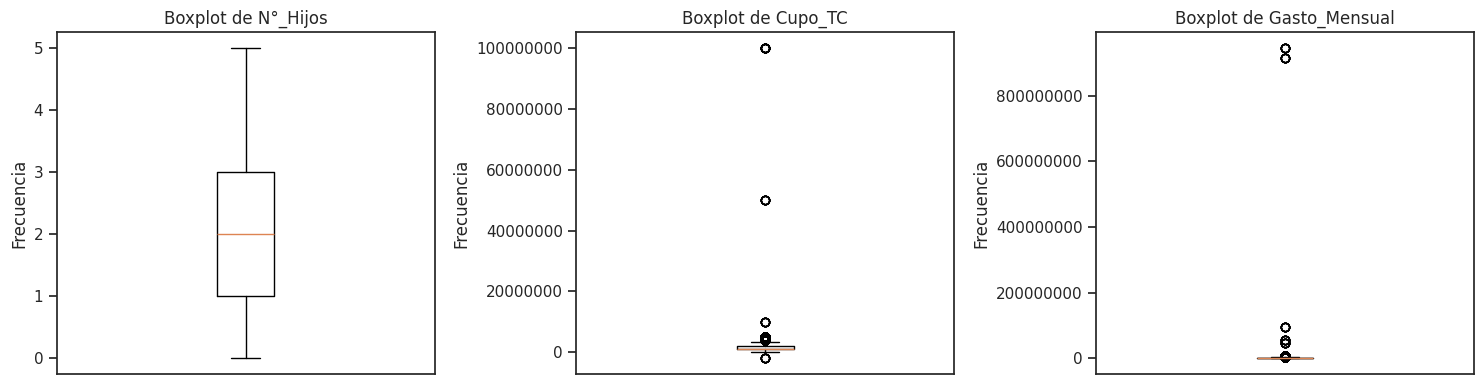

In [59]:
# Selecciona las columnas "Cupo_TC" e "Gasto_Mensual" de tu DataFrame
columnas = df[["N°_Hijos","Cupo_TC", "Gasto_Mensual"]]

# Crea una figura con tres subplots en una fila, uno por cada columna a graficar
# El número de subplots debe coincidir con el número de columnas en 'columnas'
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnas


# Crea un gráfico de caja para cada columna en su respectivo subplot
for i, column in enumerate(columnas.columns):
    ax = axes[i]
    ax.boxplot(columnas[column])  # Gráfico de boxplot con color
    ax.set_xlabel(column)  # Título del eje x con el nombre de la columna
    ax.set_ylabel("Frecuencia")  # Título del eje Y
    ax.set_title(f"Boxplot de {column}")
    # Oculta el eje x
    ax.get_xaxis().set_visible(False)
# Ajusta la disposición y muestra los gráficos uno al lado del otro
plt.tight_layout()
plt.show()

In [60]:
# Evitar notación científica y mostrar números sin decimales
pd.options.display.float_format = '{:.0f}'.format
df.describe()

,Id_cliente,N°_Hijos,Cupo_TC,Gasto_Mensual
count,196993,196993,196993,196993
mean,123507,2,1456341,1773966
std,57900,2,1280993,8569264
min,23215,0,-2000000,-935028
25%,73350,1,1000000,715227
50%,123496,2,1000000,936583
75%,173642,3,2000000,1958400
max,223788,5,100000000,946040000


**Se hace un zoom al grafico para ver los datos del bigote superior:**

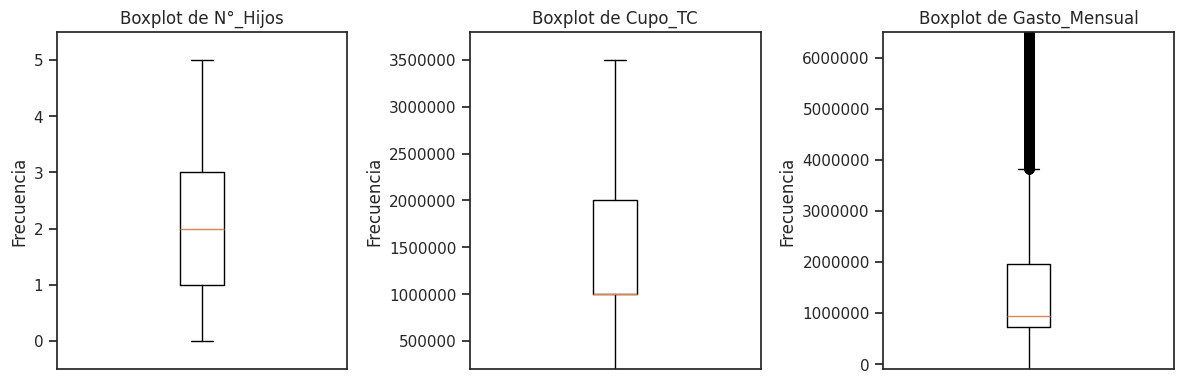

In [61]:
# Crea una figura con tres subplots en una fila, uno por cada columna a graficar
# Se ha cambiado de (1, 2) a (1, 3) para tener 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila, 3 columnas

# Crea un gráfico de caja para cada columna en su respectivo subplot
for i, column in enumerate(columnas.columns):
    ax = axes[i]
    ax.boxplot(columnas[column])  # Gráfico de boxplot con color
    ax.set_xlabel(column)  # Título del eje x con el nombre de la columna
    ax.set_ylabel("Frecuencia")  # Título del eje Y
    ax.set_title(f"Boxplot de {column}")
    # Oculta el eje x
    ax.get_xaxis().set_visible(False)
    # Ajustar el límite del eje Y para evitar que los outliers distorsionen el gráfico,
    # ampliando un poco los límites para no recortar demasiado.
    y_min, y_max = columnas[column].quantile(0.05), columnas[column].quantile(0.95)
    ax.set_ylim(y_min - 0.1*(y_max - y_min), y_max + 0.1*(y_max - y_min))

# Ajusta la disposición y muestra los gráficos uno al lado del otro
plt.tight_layout()
plt.show()



In [62]:
print("Cupo negativo:",len(df[df['Cupo_TC']<0]))
print("Cupo mayor a 3,5 millones:",len(df[df['Cupo_TC']>3500000]))

Cupo negativo: 32
Cupo mayor a 3,5 millones: 4424


In [63]:
print("Gasto negativo:",len(df[df['Gasto_Mensual']<0]))
print("Gasto mayor a 4 millones:",len(df[df['Gasto_Mensual']>4000000]))

Gasto negativo: 72
Gasto mayor a 4 millones: 24024


---

In [64]:
from scipy import stats

In [65]:
# Se define la cantidad de desviaciones estandar
corte = 3
# Calcula el Z-Score para 'Cupo_TC'
z_Cupo_TC = stats.zscore(df['Cupo_TC'])
outliers_Cupo_TC = (abs(z_Cupo_TC) > corte)
# Imprime el recuento de valores atípicos en 'Cupo_TC'
print(f"Recuento de valores atípicos en Cupo_TC: {outliers_Cupo_TC.sum()}")
# Calcula el Z-Score para 'Gasto_Mensual'
z_Gasto_Mensual = stats.zscore(df['Gasto_Mensual'])
outliers_Gasto_Mensual = (abs(z_Gasto_Mensual) > corte)
# Imprime el recuento de valores atípicos en 'Gasto_Mensual'
print(f"Recuento de valores atípicos en Gasto_Mensual: {outliers_Gasto_Mensual.sum()}")


Recuento de valores atípicos en Cupo_TC: 32
Recuento de valores atípicos en Gasto_Mensual: 40


In [66]:
# Elimina las filas con valores atípicos
df = df[~outliers_Cupo_TC]
df = df[~outliers_Gasto_Mensual]

**Se eliminaron los 72 datos atipicos que eran mas extremos, eso está correcto. Ahora quedan otros datos que no son realmente atipicos que componen un grupo de gente con mayores recursos**

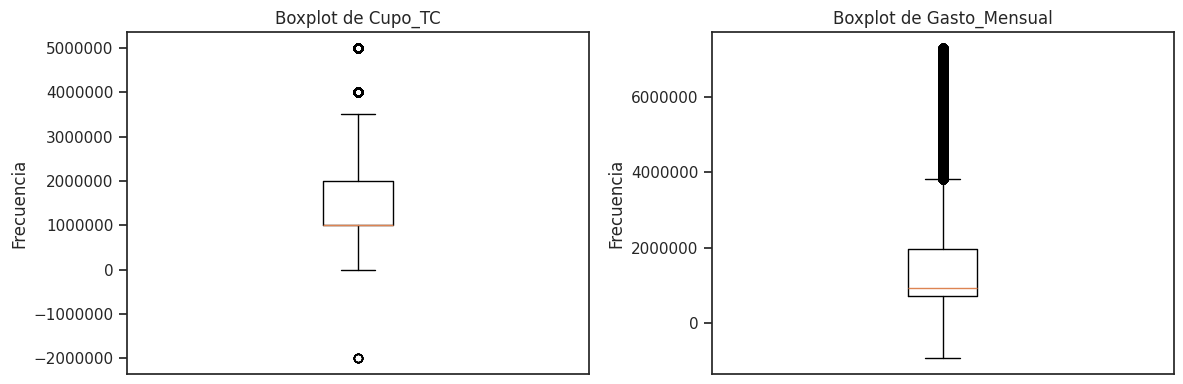

In [67]:
# Selecciona las columnas "Cupo_TC" e "Gasto_Mensual" de tu DataFrame
columnas = df[["Cupo_TC", "Gasto_Mensual"]]

# Crea una figura con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 2 columnas
# Crea un gráfico de caja para cada columna en su respectivo subplot
for i, column in enumerate(columnas.columns):
    ax = axes[i]
    ax.boxplot(columnas[column])  # Gráfico de boxplot con color
    ax.set_xlabel(column)  # Título del eje x con el nombre de la columna
    ax.set_ylabel("Frecuencia")  # Título del eje Y
    ax.set_title(f"Boxplot de {column}")
    # Oculta el eje x
    ax.get_xaxis().set_visible(False)
# Ajusta la disposición y muestra los gráficos uno al lado del otro
plt.tight_layout()
plt.show()

In [68]:
print("Cupo negativo:",len(df[df['Cupo_TC']<0]))
print("Cupo mayor a 3,5 millones:",len(df[df['Cupo_TC']>3500000]))

Cupo negativo: 32
Cupo mayor a 3,5 millones: 4392


In [69]:
print("Gasto negativo:",len(df[df['Gasto_Mensual']<0]))
print("Gasto mayor a 4 millones:",len(df[df['Gasto_Mensual']>4000000]))

Gasto negativo: 72
Gasto mayor a 4 millones: 23984


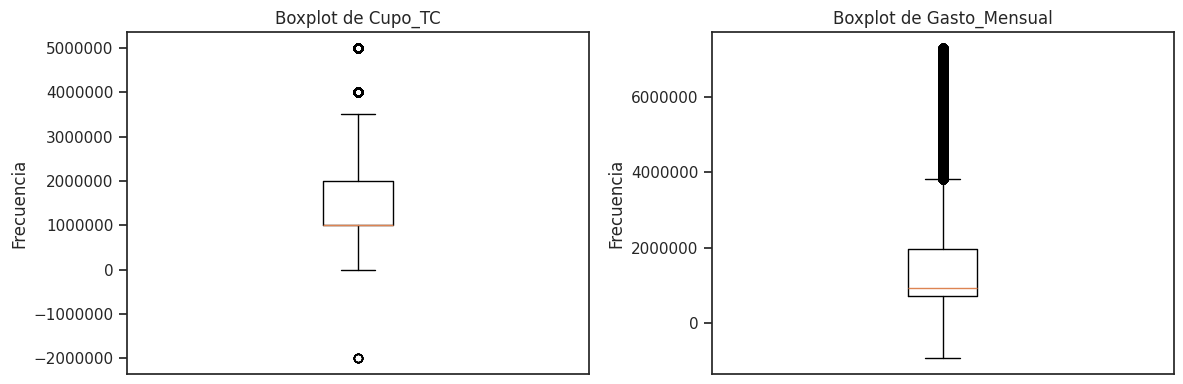

In [70]:
# Selecciona las columnas "Cupo_TC" e "Gasto_Mensual" de tu DataFrame
columnas = df[["Cupo_TC", "Gasto_Mensual"]]

# Crea una figura con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 2 columnas
# Crea un gráfico de caja para cada columna en su respectivo subplot
for i, column in enumerate(columnas.columns):
    ax = axes[i]
    ax.boxplot(columnas[column])  # Gráfico de boxplot con color
    ax.set_xlabel(column)  # Título del eje x con el nombre de la columna
    ax.set_ylabel("Frecuencia")  # Título del eje Y
    ax.set_title(f"Boxplot de {column}")
    # Oculta el eje x
    ax.get_xaxis().set_visible(False)
# Ajusta la disposición y muestra los gráficos uno al lado del otro
plt.tight_layout()
plt.show()

**Solo le falta eliminar los valores negativos**

Aun existen datos ilógicos en el dataset, los cuales hay que filtrar de forma manual: tomaremos el primer cuartil debido a que los datos fuera de la caja estan fuera de la mayor concentración de los datos.

In [71]:
# Montos bajo el valor de q1
len(df[df['Cupo_TC'] <= 1000000])

119369

In [72]:
# Montos bajo el valor de q1
len(df[df['Gasto_Mensual'] <= 715227])

49240

Son muchos datos como para eliminar, por lo que se opta por imputar.

In [73]:
df["Cupo_TC"].mode().iloc[0]

1000000

In [74]:
df["Gasto_Mensual"].mode().iloc[0]

2499900

In [75]:
# Calcular la moda de Cupo_TC
moda_Cupo_TC = df['Cupo_TC'].mode().iloc[0]

# Reemplazar los valores con la moda
df.loc[df['Cupo_TC'] <= 1000000, 'Cupo_TC'] = moda_Cupo_TC

In [76]:
# Calcular la moda de Gasto_Mensual
moda_Gasto_Mensual = df['Gasto_Mensual'].mode().iloc[0]

# Reemplazar los valores con la moda
df.loc[df['Gasto_Mensual'] <= 715227, 'Gasto_Mensual'] = moda_Gasto_Mensual

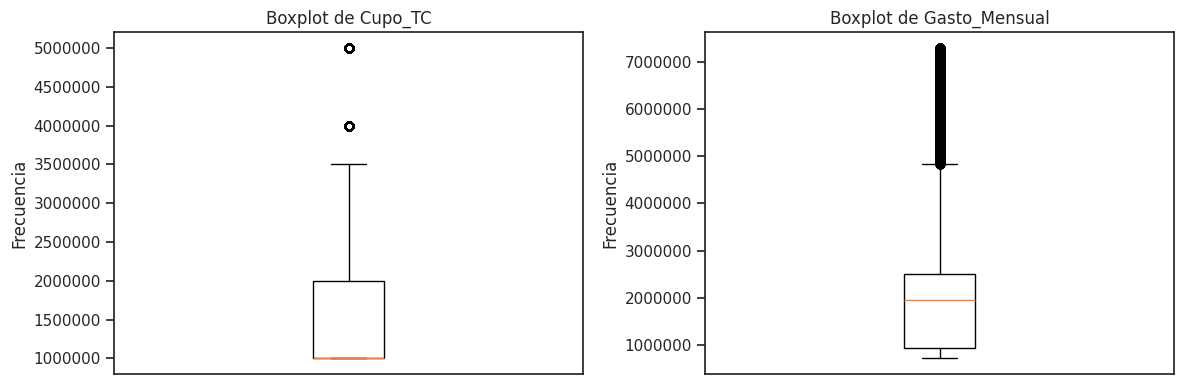

In [77]:
# Selecciona las columnas "Cupo_TC" e "Gasto_Mensual" de tu DataFrame
columnas = df[["Cupo_TC", "Gasto_Mensual"]]

# Crea una figura con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 2 columnas
# Crea un gráfico de caja para cada columna en su respectivo subplot
for i, column in enumerate(columnas.columns):
    ax = axes[i]
    ax.boxplot(columnas[column])  # Gráfico de boxplot con color
    ax.set_xlabel(column)  # Título del eje x con el nombre de la columna
    ax.set_ylabel("Frecuencia")  # Título del eje Y
    ax.set_title(f"Boxplot de {column}")
    # Oculta el eje x
    ax.get_xaxis().set_visible(False)
# Ajusta la disposición y muestra los gráficos uno al lado del otro
plt.tight_layout()
plt.show()

# **4. ANÁLISIS DE DATOS CORREGIDOS**

In [79]:
# Generar el resumen estadístico y formatear los montos
resumen_estadistico = df.describe()
resumen_estadistico['Cupo_TC'] = resumen_estadistico['Cupo_TC'].apply('{:.0f}'.format)
resumen_estadistico['Gasto_Mensual'] = resumen_estadistico['Gasto_Mensual'].apply('{:.0f}'.format)
resumen_estadistico

,Id_cliente,N°_Hijos,Cupo_TC,Gasto_Mensual
count,196921,196921,196921,196921
mean,123508,2,1509930,2178804
std,57900,2,812465,1550893
min,23215,0,1000000,715304
25%,73350,1,1000000,936583
50%,123496,2,1000000,1957710
75%,173642,3,2000000,2499900
max,223788,5,5000000,7298120


In [80]:
df.head()

,Id_cliente,Seguro,Genero,Ciudad,Region,Estado_Civil,Educacion,N°_Hijos,Cupo_TC,Gasto_Mensual
5,23215,Accidente,Femenino,Buin,Metropolitana,Soltero(a),Técnico,5,1000000,2499900
7,23217,Accidente,Femenino,Puerto Montt,Los Lagos,Soltero(a),Técnico,1,1000000,904428
8,23218,Automotriz,Masculino,Valparaíso,Valparaíso,Soltero(a),Técnico,0,1000000,2499900
9,23219,Accidente,Femenino,Concepción,Biobío,Casado(a),Técnico,4,1000000,767575
11,23221,Accidente,Femenino,Concepción,Biobío,Soltero(a),Técnico,4,1000000,995146


Agrupación de datos en tablas para resumir información del dataset:

#**5. ENCODING**

In [82]:
#Tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196921 entries, 5 to 200578
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Id_cliente     196921 non-null  int64 
 1   Seguro         196921 non-null  object
 2   Genero         196921 non-null  object
 3   Ciudad         196921 non-null  object
 4   Region         196921 non-null  object
 5   Estado_Civil   196921 non-null  object
 6   Educacion      196921 non-null  object
 7   N°_Hijos       196921 non-null  int64 
 8   Cupo_TC        196921 non-null  int64 
 9   Gasto_Mensual  196921 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 16.5+ MB


In [83]:
from sklearn.preprocessing import LabelEncoder

#Selecciona las columnas categóricas que se van a codificar
categorical_cols = ['Seguro','Genero','Ciudad','Region','Estado_Civil','Educacion']

#Itera sobre las columnas categóricas y aplica LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#Muestra los valores originales y los valores codificados
for col in categorical_cols:
    original_values = df[col]
    encoded_values = df[col]
    le = label_encoders[col]

    unique_values = original_values.unique()
    unique_encoded_values = le.inverse_transform(unique_values)

    mapping = dict(zip(unique_values, unique_encoded_values))
    print(f"Columna: {col}")
    print("Valor Codificado - Clase")
    for value, encoded_value in mapping.items():
        print(f"{value} - {encoded_value}")
    print("------------------------")

Columna: Seguro
Valor Codificado - Clase
0 - Accidente
1 - Automotriz
4 - Salud
2 - Desgravamen
6 - Vida
3 - Robo
5 - Viaje
------------------------
Columna: Genero
Valor Codificado - Clase
0 - Femenino
1 - Masculino
------------------------
Columna: Ciudad
Valor Codificado - Clase
2 - Buin
13 - Puerto Montt
18 - Valparaíso
5 - Concepción
11 - Osorno
4 - Chillán
1 - Arica
10 - Los Ángeles
6 - Copiapó
14 - Rancagua
0 - Antofagasta
8 - La Serena
7 - Iquique
9 - Linares
15 - Santiago
12 - Ovalle
17 - Temuco
16 - Talca
19 - Villarrica
3 - Calama
------------------------
Columna: Region
Valor Codificado - Clase
8 - Metropolitana
6 - Los Lagos
11 - Valparaíso
4 - Biobío
12 - Ñuble
2 - Arica y Parinacota
3 - Atacama
9 - O'Higgins
0 - Antofagasta
5 - Coquimbo
10 - Tarapacá
7 - Maule
1 - Araucanía
------------------------
Columna: Estado_Civil
Valor Codificado - Clase
1 - Soltero(a)
0 - Casado(a)
2 - Viudo(a)
------------------------
Columna: Educacion
Valor Codificado - Clase
3 - Técnico
2 - M

In [84]:
df

,Id_cliente,Seguro,Genero,Ciudad,Region,Estado_Civil,Educacion,N°_Hijos,Cupo_TC,Gasto_Mensual
5,23215,0,0,2,8,1,3,5,1000000,2499900
7,23217,0,0,13,6,1,3,1,1000000,904428
8,23218,1,1,18,11,1,3,0,1000000,2499900
9,23219,0,0,5,4,0,3,4,1000000,767575
11,23221,0,0,5,4,1,3,4,1000000,995146
...,...,...,...,...,...,...,...,...,...,...
200572,223782,0,0,14,9,1,4,0,2000000,2292900
200574,223784,1,1,18,11,1,4,1,2000000,1802600
200575,223785,0,0,18,11,2,4,2,2000000,2023700
200576,223786,0,0,18,11,2,4,1,2000000,2731300


---
---
# **DOCUMENTACIÓN**

NumPy. (n.d.). NumPy user guide. Recuperado de https://numpy.org/devdocs/user/index.html#user

pandas. (n.d.). pandas user guide. Recuperado de https://pandas.pydata.org/docs/user_guide/index.html

SciPy. (n.d.). SciPy documentation. Recuperado de https://docs.scipy.org/doc/scipy/

Matplotlib. (n.d.). Matplotlib user guide. Recuperado de https://matplotlib.org/stable/users/index.html

Waskom, M. L. (n.d.). Seaborn tutorial. Recuperado de https://seaborn.pydata.org/tutorial.html